<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_12_%EC%8B%A4%EC%A0%84_%ED%95%9C%EA%B5%AD_%EB%B6%80%EB%8F%99%EC%82%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.12. 실전-한국 부동산 데이터 시각화 경진대회

---

* 날짜:
* 이름:

[한국 부동산 데이터 시각화 경진대회](https://dacon.io/competitions/official/235724/overview/description)

In [1]:
import matplotlib.font_manager as fm

In [5]:
for font in fm.fontManager.ttflist:     # 한글 데이터이기 때문에 폰트가 필요함
  print(font.name)

DejaVu Sans
STIXNonUnicode
STIXNonUnicode
STIXSizeOneSym
STIXGeneral
DejaVu Serif
DejaVu Sans Mono
STIXSizeFiveSym
cmtt10
DejaVu Sans Mono
cmex10
DejaVu Serif
STIXSizeFourSym
DejaVu Sans
cmsy10
STIXGeneral
DejaVu Sans Mono
DejaVu Sans Mono
STIXSizeThreeSym
STIXNonUnicode
STIXSizeTwoSym
cmss10
STIXGeneral
STIXSizeTwoSym
cmr10
STIXSizeThreeSym
STIXSizeOneSym
DejaVu Sans
DejaVu Sans
cmmi10
STIXSizeFourSym
DejaVu Sans Display
cmb10
DejaVu Serif
STIXNonUnicode
DejaVu Serif
STIXGeneral
DejaVu Serif Display
NanumGothic
NanumMyeongjo
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Sans
NanumGothic
NanumSquare
Liberation Mono
Liberation Serif
Liberation Sans
Liberation Sans Narrow
NanumMyeongjo
NanumSquareRound
NanumBarunGothic
Liberation Serif
Humor Sans
NanumSquare
Liberation Serif
Liberation Sans
Liberation Mono
Liberation Sans Narrow
Liberation Serif
NanumBarunGothic
NanumSquareRound
Liberation Sans Narrow
Liberation Mono


In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os

sns.set(font_scale=1.2, style='white', palette='tab20')
plt.rcParams['font.family']=get_font_family() 

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [6]:
from google.colab import drive # 드라이브 파일 마운트
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
df_path='/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/235724_한국 부동산 데이터 시각화 경진대회_data'  # 경로 설정

In [14]:
df = pd.read_csv('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/235724_한국 부동산 데이터 시각화 경진대회_data/주택매매가격지수(KB).csv')

In [15]:
df

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986-02-01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986-03-01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986-04-01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986-05-01,34.293,60.848,41.837,20.664,16.945,29.588
...,...,...,...,...,...,...,...
418,2020-11-01,107.125,104.334,106.398,107.506,114.853,112.139
419,2020-12-01,108.586,104.909,107.237,109.346,116.365,113.532
420,2021-01-01,109.878,105.303,107.895,111.005,118.230,114.974
421,2021-02-01,111.375,105.718,108.706,112.957,120.121,116.290


In [19]:
df[df['Unnamed: 0'].str.contains('01-01')].head() # 1월 1일의 값만 뽑아서 추려냄

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,34.656,61.347,43.053,20.973,17.153,30.044
12,1987-01-01,33.670,60.349,40.430,20.046,16.291,28.718
24,1988-01-01,36.576,65.171,42.285,22.441,17.391,29.505
36,1989-01-01,41.349,71.239,48.362,27.076,20.988,32.447
48,1990-01-01,47.263,79.884,57.190,32.174,24.615,37.876


In [20]:
df1 = pd.DataFrame(df['Unnamed: 0'].str.split('-').tolist(),columns=['year','month','date']) # 년도와 날짜가 있는 컬럼을 분리시킨다.
df1

,year,month,date
0,1986,01,01
1,1986,02,01
2,1986,03,01
3,1986,04,01
4,1986,05,01
...,...,...,...
418,2020,11,01
419,2020,12,01
420,2021,01,01
421,2021,02,01


In [26]:
df=pd.concat([df1,df], axis=1)

In [30]:
df=df.drop(['Unnamed: 0'], axis=1)

In [32]:
df.head() # 연도와 월이 합쳐진 행을 분리.

,year,month,date,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986,01,01,34.656,61.347,43.053,20.973,17.153,30.044
1,1986,02,01,34.656,61.347,42.925,20.973,17.183,30.044
2,1986,03,01,34.708,61.513,42.733,20.935,17.153,30.002
3,1986,04,01,34.449,61.097,42.733,20.819,17.034,29.837
4,1986,05,01,34.293,60.848,41.837,20.664,16.945,29.588


In [35]:
df1=df.groupby('year').sum()/12 # 각각의 컬럼의 값을 평균내서 년도별 그룹으로 묶는다.

In [63]:
df1=df1.drop(['2021']) # 2021년의 값은 3월까지 밖에 없으므로 삭제한다.

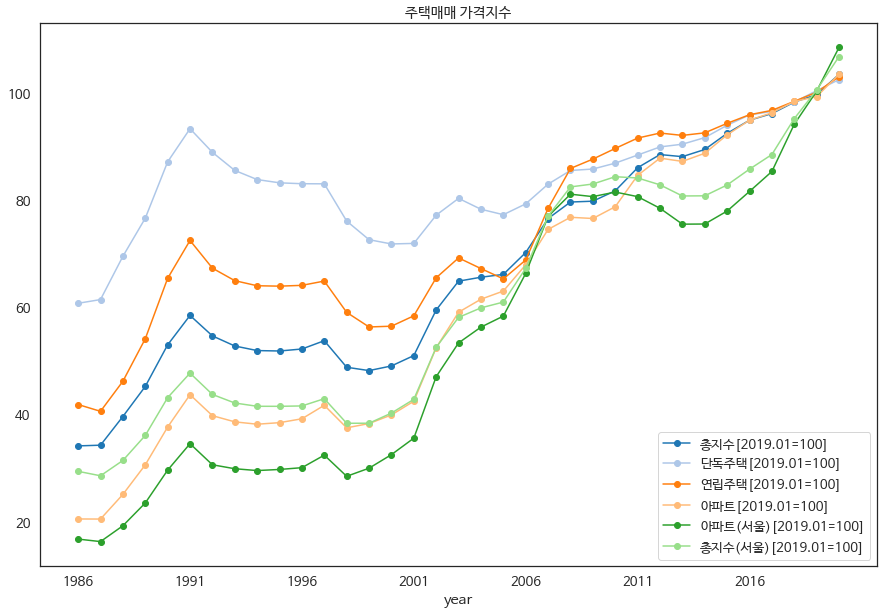

In [74]:
df1.plot(marker='o',figsize=(15,10),title='주택매매 가격지수')

In [75]:
dfs = pd.read_csv('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/235724_한국 부동산 데이터 시각화 경진대회_data/주택전세가격지수(KB).csv')

In [76]:
dfs  # 주택전세가격지수 데이터 추출

,Unnamed: 0,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040
...,...,...,...,...,...,...,...
418,2020-11-01,104.886,102.823,105.011,105.140,110.216,109.252
419,2020-12-01,106.043,103.249,105.711,106.608,112.406,110.887
420,2021-01-01,106.925,103.545,106.306,107.688,114.116,112.229
421,2021-02-01,107.730,103.887,106.959,108.651,115.372,113.272


In [77]:
dfs1 = pd.DataFrame(dfs['Unnamed: 0'].str.split('-').tolist(),columns=['year','month','date']) # 전세지수도 매매지수와 같은 전처리를 해준다.

In [78]:
dfs=pd.concat([dfs1,dfs], axis=1)

In [79]:
dfs=dfs.drop(['Unnamed: 0'], axis=1)

In [80]:
dfs1=dfs.groupby('year').sum()/12

In [81]:
dfs1=dfs1.drop(['2021'])

In [82]:
dfs1

,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
year,,,,,,
1986,18.532000,36.957750,19.038333,11.617333,10.725000,17.784083
1987,20.411833,40.390083,20.802250,13.061250,12.059667,19.258083
1988,24.959000,49.422333,24.870917,16.075750,14.460833,22.917500
1989,28.207833,54.916667,28.860333,18.652333,16.753500,25.946917
1990,34.515917,65.867667,36.663500,23.507167,22.203417,32.499583
1991,35.825000,66.602417,39.080250,25.282583,24.203083,33.879417
1992,37.414000,68.633333,42.042333,26.685000,25.863000,35.519167
1993,38.695667,70.794750,43.531250,27.708750,26.589500,36.249750
1994,39.840500,71.897417,44.801333,29.059250,27.860167,37.002917


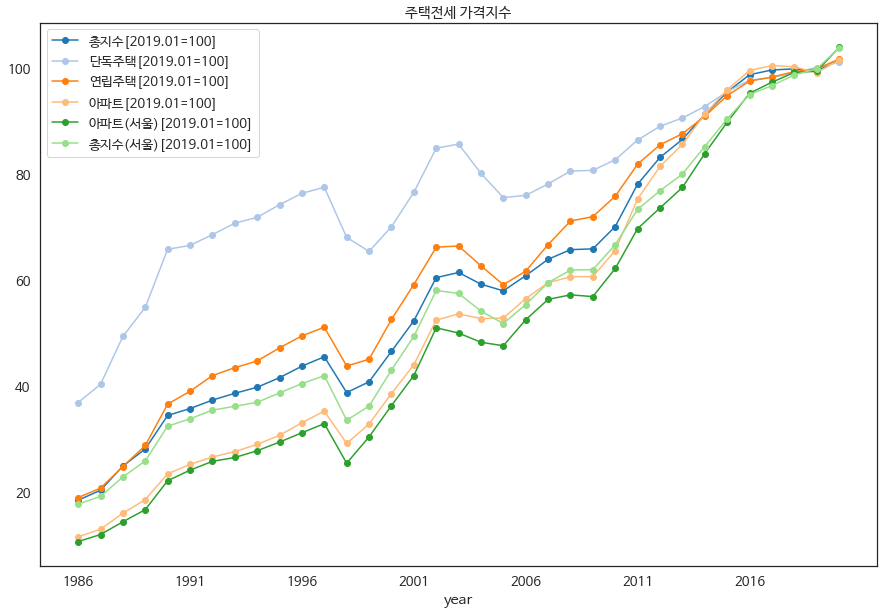

In [87]:
dfs1.plot(marker='o',figsize=(15,10),title='주택전세 가격지수') # 주택전세 가격지수를 선그래프로 나타냄

In [129]:
dfp = pd.read_csv('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/235724_한국 부동산 데이터 시각화 경진대회_data/미분양주택현황.csv')

In [130]:
dfp # 미분양 주택 현황 데이터를 가져온다.

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2007-01-01,75616.0,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
1,2007-02-01,73619.0,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2,2007-03-01,73162.0,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
3,2007-04-01,73393.0,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
4,2007-05-01,78571.0,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
166,2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
167,2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0
168,2021-01-01,17130.0,49.0,944.0,419.0,245.0,307.0,635.0,438.0,1567.0,2671.0,234.0,2061.0,251.0,1046.0,2049.0,2964.0,1250.0,1861.0,0.0


In [ ]:
dfp=dfp[dfp['Unnamed: 0'].str.contains('01-01')] # 1월 1일의 값이 기준이 되기 때문에 1월 1일을 제외한 나머지는 버린다.

In [ ]:
dfp=dfp.iloc[9:14,:]  # 또한 데이터의 년도가 파이차트로 나타내기 너무 많기때문에 최근 5년 데이터만 추려낸다.

In [103]:
dfp=dfp.drop(['전국[호]'], axis=1) # 전국의 데이터를 제외시키고 각 도시만 남긴다.

In [105]:
dfp

,Unnamed: 0,서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
108,2016-01-01,737.0,1308.0,1806.0,4036.0,672.0,1038.0,857.0,24276.0,2264.0,5007.0,8530.0,1311.0,1563.0,3725.0,3353.0,119.0,29049.0,4.0
120,2017-01-01,205.0,1102.0,828.0,3641.0,818.0,551.0,682.0,15092.0,3466.0,4043.0,9094.0,2468.0,1153.0,8032.0,7785.0,353.0,18938.0,0.0
132,2018-01-01,45.0,2291.0,143.0,1192.0,562.0,1084.0,1089.0,8611.0,2693.0,4634.0,11352.0,1846.0,1249.0,7806.0,13227.0,1280.0,9848.0,0.0
144,2019-01-01,27.0,5224.0,291.0,1357.0,52.0,1407.0,1006.0,6769.0,5589.0,3525.0,7149.0,1567.0,1421.0,8531.0,14060.0,1187.0,8153.0,0.0
156,2020-01-01,131.0,2266.0,1414.0,1035.0,59.0,941.0,1142.0,3735.0,4964.0,1166.0,5470.0,1009.0,1654.0,5639.0,11586.0,1057.0,4901.0,0.0


In [106]:
dfp1=dfp.groupby('Unnamed: 0').sum()
dfp1

,서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
Unnamed: 0,,,,,,,,,,,,,,,,,,
2016-01-01,737.0,1308.0,1806.0,4036.0,672.0,1038.0,857.0,24276.0,2264.0,5007.0,8530.0,1311.0,1563.0,3725.0,3353.0,119.0,29049.0,4.0
2017-01-01,205.0,1102.0,828.0,3641.0,818.0,551.0,682.0,15092.0,3466.0,4043.0,9094.0,2468.0,1153.0,8032.0,7785.0,353.0,18938.0,0.0
2018-01-01,45.0,2291.0,143.0,1192.0,562.0,1084.0,1089.0,8611.0,2693.0,4634.0,11352.0,1846.0,1249.0,7806.0,13227.0,1280.0,9848.0,0.0
2019-01-01,27.0,5224.0,291.0,1357.0,52.0,1407.0,1006.0,6769.0,5589.0,3525.0,7149.0,1567.0,1421.0,8531.0,14060.0,1187.0,8153.0,0.0
2020-01-01,131.0,2266.0,1414.0,1035.0,59.0,941.0,1142.0,3735.0,4964.0,1166.0,5470.0,1009.0,1654.0,5639.0,11586.0,1057.0,4901.0,0.0


In [101]:
field=['서울[호]', '부산[호]', '대구[호]', '인천[호]', '광주[호]',
       '대전[호]', '울산[호]', '경기[호]', '강원[호]', '충북[호]', '충남[호]', '전북[호]', '전남[호]',
       '경북[호]', '경남[호]', '제주[호]', '수도권[호]', '세종[호]'] # 파이차트의 라벨을 정해준다.

Text(0.5, 1.0, '2020년')

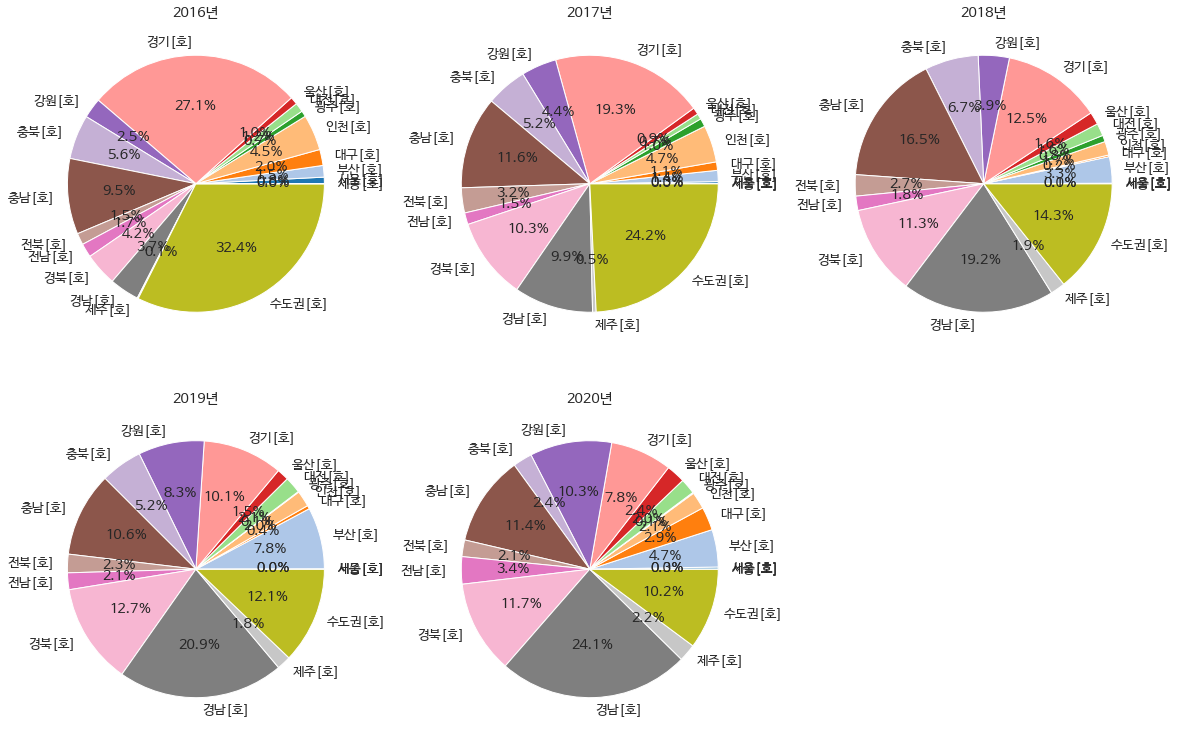

In [123]:
plt.figure(figsize=(20, 13))

plt.subplot(2,3,1)
_=plt.pie(dfp1.iloc[0,:],labels=field, autopct='%.1f%%')
plt.title('2016년')

plt.subplot(2,3,2)
_=plt.pie(dfp1.iloc[1,:],labels=field, autopct='%.1f%%')
plt.title('2017년')

plt.subplot(2,3,3)
_=plt.pie(dfp1.iloc[2,:],labels=field, autopct='%.1f%%')
plt.title('2018년')

plt.subplot(2,3,4)
_=plt.pie(dfp1.iloc[3,:],labels=field, autopct='%.1f%%')
plt.title('2019년')

plt.subplot(2,3,5)
_=plt.pie(dfp1.iloc[4,:],labels=field, autopct='%.1f%%')
plt.title('2020년')

In [133]:
dfp=dfp[dfp['Unnamed: 0'].str.contains('2020')] # 데이터를 더 세분화 시켜서 최근 1년, 2020년도의 데이터를 월별로 분류해 그래프로 표현해 보았다.

In [134]:
dfp

,Unnamed: 0,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
156,2020-01-01,43268.0,131.0,2266.0,1414.0,1035.0,59.0,941.0,1142.0,3735.0,4964.0,1166.0,5470.0,1009.0,1654.0,5639.0,11586.0,1057.0,4901.0,0.0
157,2020-02-01,39456.0,112.0,2061.0,1072.0,487.0,36.0,1012.0,659.0,3634.0,4168.0,1202.0,5085.0,924.0,1455.0,5436.0,11099.0,1014.0,4233.0,0.0
158,2020-03-01,38304.0,91.0,1979.0,1031.0,449.0,32.0,968.0,695.0,3662.0,3902.0,1109.0,4843.0,849.0,1387.0,5296.0,10827.0,1184.0,4202.0,0.0
159,2020-04-01,36629.0,78.0,1993.0,1068.0,481.0,31.0,917.0,699.0,3224.0,3742.0,919.0,4334.0,822.0,1373.0,5077.0,10590.0,1281.0,3783.0,0.0
160,2020-05-01,33894.0,70.0,2149.0,1159.0,342.0,31.0,871.0,614.0,2604.0,3470.0,365.0,4695.0,661.0,1249.0,4306.0,9971.0,1337.0,3016.0,0.0
161,2020-06-01,29262.0,61.0,1666.0,940.0,266.0,31.0,875.0,555.0,2445.0,3202.0,355.0,3683.0,631.0,1244.0,3487.0,8542.0,1279.0,2772.0,0.0
162,2020-07-01,28883.0,58.0,1544.0,957.0,294.0,31.0,849.0,548.0,2793.0,3015.0,352.0,3266.0,534.0,1244.0,3276.0,8840.0,1282.0,3145.0,0.0
163,2020-08-01,28831.0,56.0,1454.0,1624.0,525.0,31.0,783.0,502.0,2585.0,2816.0,337.0,3233.0,511.0,860.0,3423.0,8841.0,1250.0,3166.0,0.0
164,2020-09-01,28309.0,54.0,1397.0,1216.0,414.0,259.0,773.0,494.0,3338.0,3060.0,319.0,3030.0,488.0,758.0,3325.0,8163.0,1221.0,3806.0,0.0
165,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0


In [146]:
dfp=dfp.groupby('Unnamed: 0').sum()

Text(0, 0.5, '미분양 주택수')

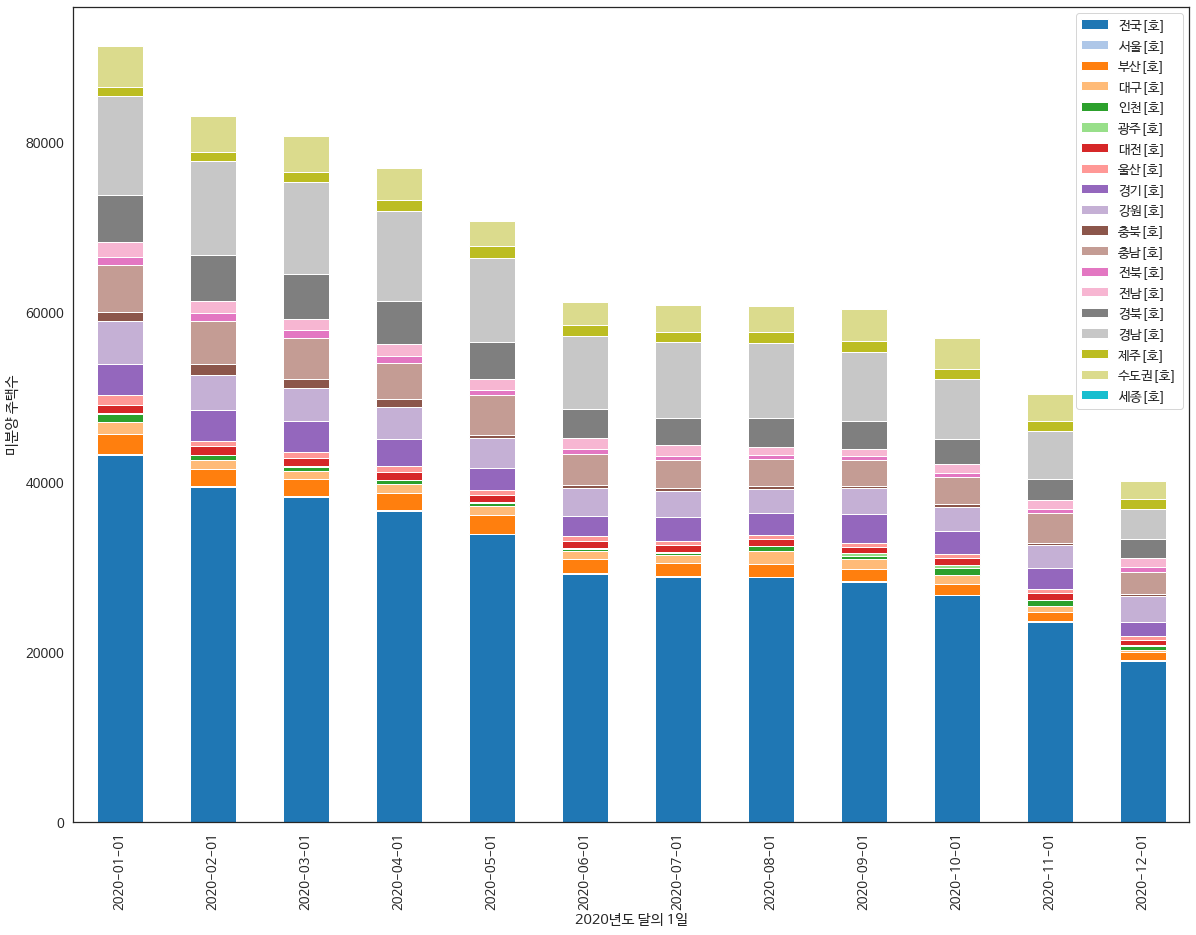

In [152]:
dfp.plot(kind='bar',figsize=(20,15),stacked=True,) # 연도별 데이터를 더 세분화해서 2020년도 월별 데이터로 전환
plt.xlabel('2020년도 달의 1일')
plt.ylabel('미분양 주택수')

In [153]:
dfv = pd.read_csv('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/235724_한국 부동산 데이터 시각화 경진대회_data/아파트 실거래가격지수.csv')
dfv # 아파트 실거래가격지수 데이터 추출

,Unnamed: 0,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],...,경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],광역시[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
0,2006-01-01,59.3,59.0,62.0,49.7,62.5,62.4,54.2,76.1,48.8,...,66.3,63.0,38.7,NaN,55.8,62.3,62.0,60.6,65.4,59.1
1,2006-02-01,58.1,59.3,63.8,49.4,62.6,62.8,53.9,75.6,48.9,...,66.2,62.9,37.6,NaN,55.7,62.6,62.7,61.7,66.6,59.2
2,2006-03-01,59.5,59.5,66.4,49.1,62.4,63.2,53.8,74.9,49.8,...,66.3,63.2,35.8,NaN,55.6,62.7,63.3,63.2,67.7,59.2
3,2006-04-01,59.5,59.7,67.9,48.6,62.3,63.7,53.7,74.2,50.3,...,66.1,62.8,36.1,NaN,55.4,62.9,63.8,64.1,68.4,59.2
4,2006-05-01,61.4,59.6,67.1,48.2,62.0,64.1,53.0,73.8,51.6,...,66.1,62.7,36.5,NaN,55.3,62.9,64.1,64.1,69.0,59.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2020-09-01,146.7,158.0,147.7,99.7,113.0,111.7,117.0,132.8,94.1,...,89.3,88.5,93.2,NaN,108.1,94.3,114.2,150.6,129.2,101.5
177,2020-10-01,147.1,159.4,148.1,102.7,115.3,111.8,118.4,135.5,95.9,...,90.3,89.4,93.3,NaN,110.5,95.1,115.8,151.7,130.8,103.1
178,2020-11-01,149.4,162.6,150.3,108.8,119.3,113.1,121.5,137.5,100.4,...,92.2,92.1,94.5,NaN,114.9,96.7,118.6,154.1,133.3,106.1
179,2020-12-01,152.5,166.1,153.5,114.6,124.3,115.1,123.2,139.2,104.1,...,95.9,95.3,96.9,NaN,119.1,99.0,121.8,157.3,136.6,109.3


In [154]:
dfv=dfv[dfv['Unnamed: 0'].str.contains('11-01')] # 11월의 데이터를 중심으로 100지수 이기 때문에 11월만 추려서 가져온다.
dfv

,Unnamed: 0,도심권[2017.11=100],동북권[2017.11=100],동남권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100],울산[2017.11=100],...,경북[2017.11=100],경남[2017.11=100],제주[2017.11=100],광역시[2017.11=100],지방광역시[2017.11=100],지방도[2017.11=100],전국[2017.11=100],서울[2017.11=100],수도권[2017.11=100],지방[2017.11=100]
10,2006-11-01,71.2,68.3,76.3,48.7,61.4,71.1,54.0,74.0,60.7,...,71.6,65.4,38.3,NaN,57.3,65.5,72.5,73.1,80.9,61.5
22,2007-11-01,80.4,78.9,74.7,50.3,59.2,88.1,54.4,72.8,65.7,...,73.6,68.7,40.5,NaN,57.9,68.1,76.1,77.8,87.5,63.1
34,2008-11-01,80.6,83.1,65.6,52.3,57.0,97.1,55.2,72.9,63.4,...,73.8,70.8,41.2,NaN,57.9,71.0,75.3,74.3,85.9,64.6
46,2009-11-01,87.9,89.5,79.2,56.6,57.7,99.5,54.6,79.0,67.6,...,74.3,73.4,45.5,NaN,60.8,73.2,79.4,84.6,92.4,67.1
58,2010-11-01,82.2,84.5,76.8,64.6,58.1,94.3,57.6,85.8,68.8,...,75.5,81.8,51.3,NaN,65.5,78.4,79.1,81.2,87.4,72.0
60,2011-01-01,84.5,86.7,79.5,67.6,59.1,94.7,59.8,89.6,70.7,...,76.3,86.1,52.0,NaN,67.9,80.7,81.2,83.4,89.3,74.4
70,2011-11-01,82.9,85.0,75.3,78.2,65.2,89.9,69.4,98.3,81.4,...,83.4,98.5,57.7,NaN,77.2,90.5,85.4,80.8,87.1,83.9
82,2012-11-01,78.7,79.1,69.0,76.4,68.9,83.3,72.0,93.3,85.6,...,89.5,95.6,59.5,NaN,77.4,91.3,83.2,75.3,81.2,84.5
94,2013-11-01,77.6,80.4,71.2,78.5,78.5,84.1,76.2,96.6,88.8,...,98.6,98.8,59.7,NaN,81.5,94.2,85.7,76.8,82.4,87.9
106,2014-11-01,80.6,83.0,75.2,81.8,88.8,87.4,83.2,97.3,93.6,...,106.3,104.3,66.0,NaN,86.8,98.6,89.9,79.8,85.8,92.8


In [159]:
dfv=dfv.iloc[:,:9]

In [164]:
dfv=dfv.drop(['동북권[2017.11=100]'], axis=1)

In [165]:
dfv=dfv.drop(['동남권[2017.11=100]'], axis=1) # 주요 6개 도시의 데이터만 뽑아냄.

In [166]:
dfv # 한국 주요 6개 도시의 아파트 실거래 가격 지수

,Unnamed: 0,도심권[2017.11=100],부산[2017.11=100],대구[2017.11=100],인천[2017.11=100],광주[2017.11=100],대전[2017.11=100]
10,2006-11-01,71.2,48.7,61.4,71.1,54.0,74.0
22,2007-11-01,80.4,50.3,59.2,88.1,54.4,72.8
34,2008-11-01,80.6,52.3,57.0,97.1,55.2,72.9
46,2009-11-01,87.9,56.6,57.7,99.5,54.6,79.0
58,2010-11-01,82.2,64.6,58.1,94.3,57.6,85.8
60,2011-01-01,84.5,67.6,59.1,94.7,59.8,89.6
70,2011-11-01,82.9,78.2,65.2,89.9,69.4,98.3
82,2012-11-01,78.7,76.4,68.9,83.3,72.0,93.3
94,2013-11-01,77.6,78.5,78.5,84.1,76.2,96.6
106,2014-11-01,80.6,81.8,88.8,87.4,83.2,97.3


In [210]:
dfv=dfv.groupby('Unnamed: 0').sum()

Text(0, 0.5, '실거래가 지수')

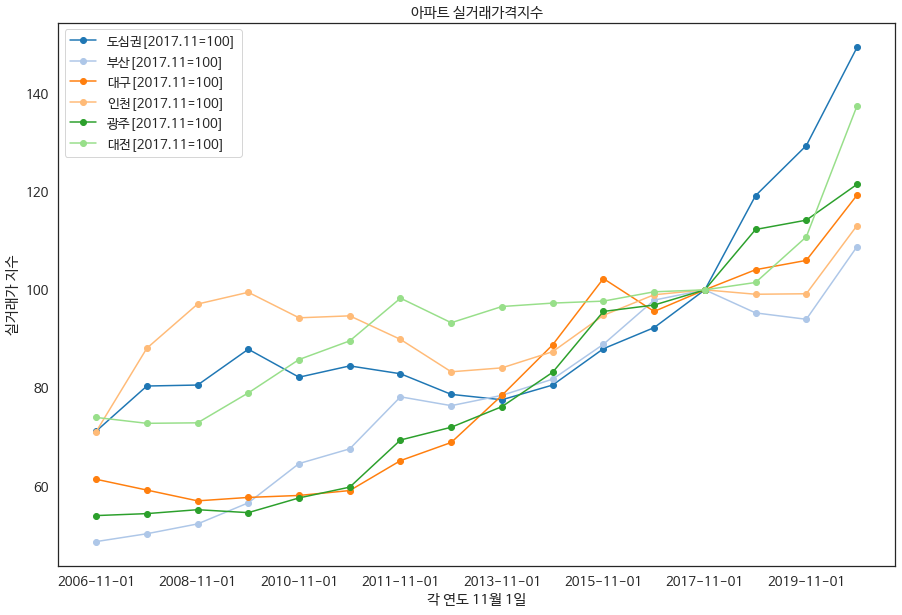

In [204]:
dfv.plot(marker='o',figsize=(15,10),title='아파트 실거래가격지수') # 주요 6개 도시 아파트 실거래가격 지수 선그래프화
plt.xlabel('각 연도 11월 1일')
plt.ylabel('실거래가 지수')

In [191]:
dfb = pd.read_csv('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/235724_한국 부동산 데이터 시각화 경진대회_data/지역별_지가변동률.csv')

In [192]:
dfb # 지역별 지가 변동율 데이터 추출

,Unnamed: 0,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
1,2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2,2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
3,2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
4,2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2020-10-01,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
190,2020-11-01,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
191,2020-12-01,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004
192,2021-01-01,0.311,0.408,0.281,0.342,0.297,0.305,0.386,0.184,0.818,0.308,0.219,0.247,0.205,0.196,0.295,0.183,0.121,-0.012


In [193]:
dfb=dfb[dfb['Unnamed: 0'].str.contains('01-01')]
dfb

,Unnamed: 0,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
0,2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
12,2006-01-01,0.355,0.343,0.182,0.543,0.338,0.136,0.570,0.243,NaN,0.361,0.273,0.768,0.841,0.145,0.180,0.298,0.241,0.217
24,2007-01-01,0.360,0.517,0.215,0.358,0.451,0.054,0.212,0.328,NaN,0.400,0.165,0.128,0.168,0.114,0.093,0.173,0.186,0.184
36,2008-01-01,0.368,0.532,0.167,0.227,0.466,0.083,0.142,0.180,NaN,0.401,0.188,0.136,0.254,0.111,0.175,0.164,0.250,0.136
48,2009-01-01,-0.756,-0.914,-0.408,-0.536,-0.924,-0.230,-0.271,-0.253,NaN,-1.026,-0.182,-0.295,-0.555,-0.915,-0.235,-0.386,-0.176,-0.546
60,2010-01-01,0.253,0.247,0.130,0.273,0.446,0.113,0.119,0.118,NaN,0.352,0.101,0.090,0.179,0.072,0.121,0.241,0.139,0.141
72,2011-01-01,0.091,0.122,0.081,0.105,0.056,0.083,0.168,0.059,NaN,0.082,0.057,0.039,0.055,0.054,0.083,0.029,0.116,0.034
84,2012-01-01,0.087,0.031,0.149,0.150,0.043,0.057,0.125,0.099,NaN,0.113,0.161,0.058,0.086,0.140,0.110,0.121,0.138,0.088
96,2013-01-01,0.031,-0.058,0.136,0.103,0.005,0.050,0.068,0.158,0.658,0.037,0.119,0.074,0.067,0.097,0.071,0.094,0.122,0.112
108,2014-01-01,0.107,0.190,0.099,0.165,0.054,0.052,0.022,0.098,0.415,0.042,0.083,0.012,0.071,0.095,0.109,0.104,0.096,0.226


In [194]:
dfb=dfb.groupby('Unnamed: 0').sum()

Text(0, 0.5, '지가 변동율')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


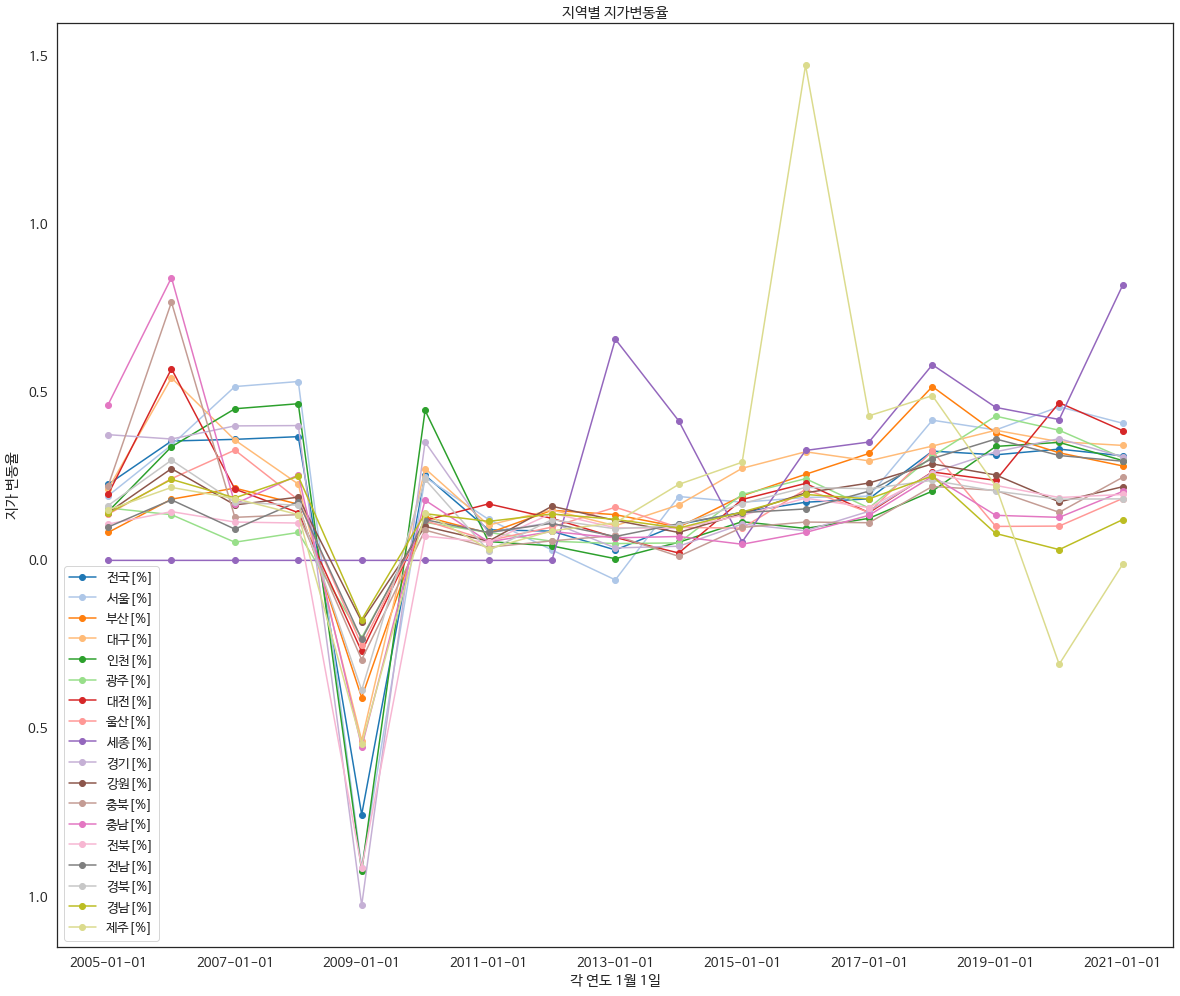

In [209]:
dfb.plot(marker='o',figsize=(20,17),title='지역별 지가변동율') # 지역별 지가 변동율을 그래프화
plt.xlabel('각 연도 1월 1일')
plt.ylabel('지가 변동율')